In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

df = pd.read_csv('TED_Preprocessed.csv')
df = df[df['views'] < 200000]

In [2]:
del df['video_link']
del df['date_month_year']

### 1. Analysing likes

In [3]:
print('Max = ', max(df['likes']))
print('Min = ', min(df['likes']))
print('Avg = ', int(df['likes'].mean()))

Max =  9100
Min =  36
Avg =  1625


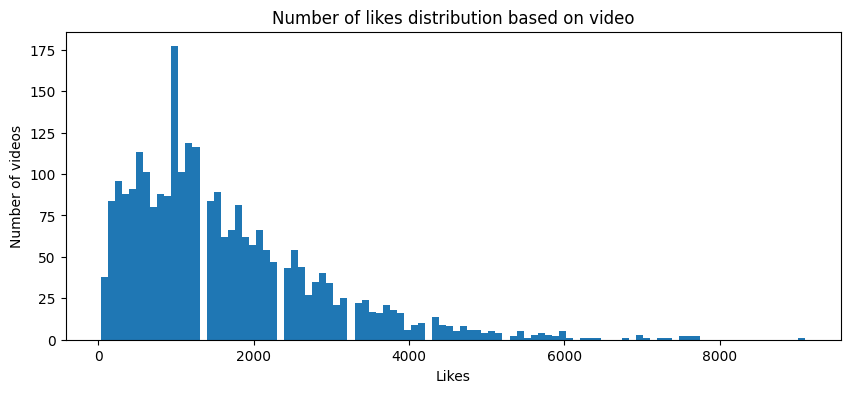

In [4]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df['likes'], bins = 100)
plt.title('Number of likes distribution based on video')
plt.xlabel('Likes')
plt.ylabel('Number of videos')
plt.show()

### 2. Analysing views

In [5]:
print('Max = ', max(df['views']))
print('Min = ', min(df['views']))
print('Avg = ', int(df['views'].mean()))

Max =  199743
Min =  5699
Avg =  84872


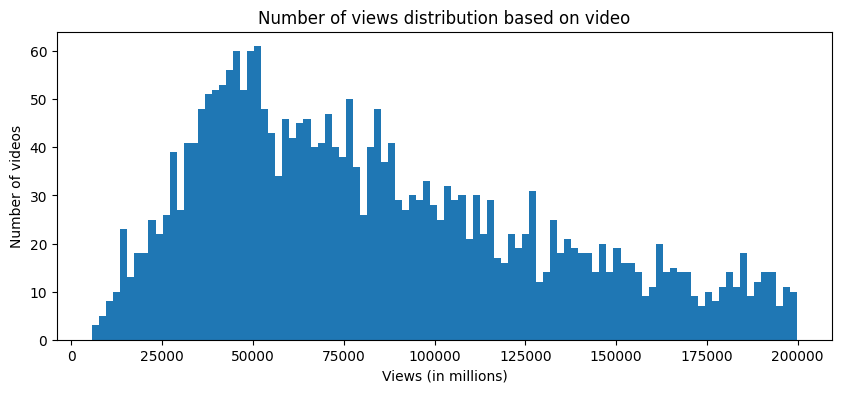

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df['views'], bins = 100)
plt.title('Number of views distribution based on video')
plt.xlabel('Views (in millions)')
plt.ylabel('Number of videos')
plt.show()

### 3. Analysing comments

In [7]:
print('Max = ', max(df['comments']))
print('Min = ', min(df['comments']))
print('Avg = ', int(df['comments'].mean()))

Max =  3062
Min =  2
Avg =  197


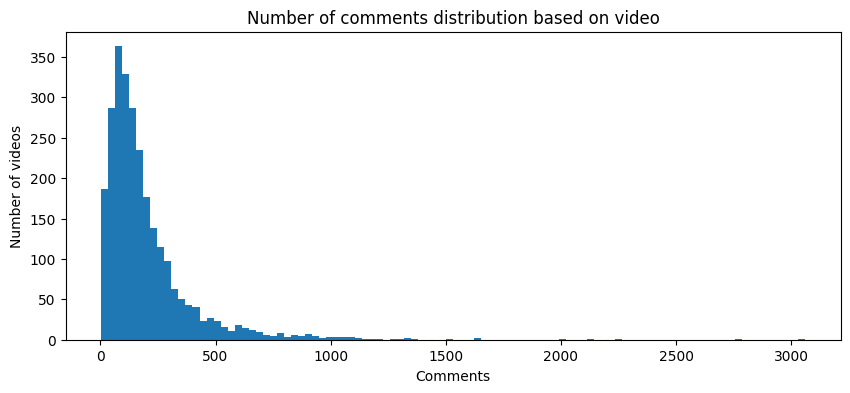

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df['comments'], bins = 100)
plt.title('Number of comments distribution based on video')
plt.xlabel('Comments')
plt.ylabel('Number of videos')
plt.show()

## Finding correlations from scratch

### a) Views-to-like

In [9]:
factors = []
for i in df['likes']/df['views']:
    factors.append(round(i,5))
    
df['views_to_like'] = factors

In [10]:
df.head(2)

,duration,title,views,likes,comments,date,month,year,day,views_to_like
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387


In [11]:
print('Max = ', max(df['views_to_like']))
print('Min = ', min(df['views_to_like']))
print('Avg = ', (df['views_to_like'].mode()))

Max =  0.07977
Min =  0.00143
Avg =  0    0.01388
Name: views_to_like, dtype: float64


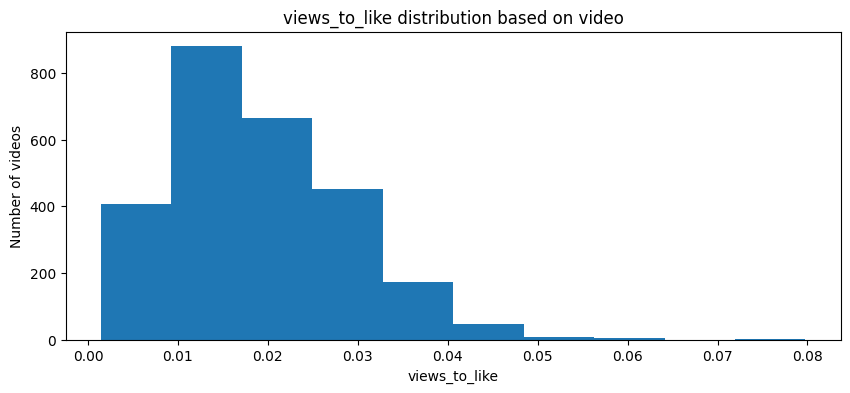

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df['views_to_like'], bins = 10)
plt.title('views_to_like distribution based on video')
plt.xlabel('views_to_like')
plt.ylabel('Number of videos')
plt.show()

#### b) Adding predicted likes column

In [13]:
factor = df['views_to_like'].mode()[0]

In [14]:
predicted_likes = []

for i in df['views']:
    predicted_likes.append(int(i*factor))
    
df['predicted_likes'] = predicted_likes

In [15]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,views_to_like,predicted_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706,711
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387,355
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954,297
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.03137,530
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.01387,449


#### c) Correlation between Views and Likes

In [16]:
data = []

for i in df.values:
    data.append([i[2], i[3]])
    
df_ = pd.DataFrame(data, columns=['views', 'likes'])

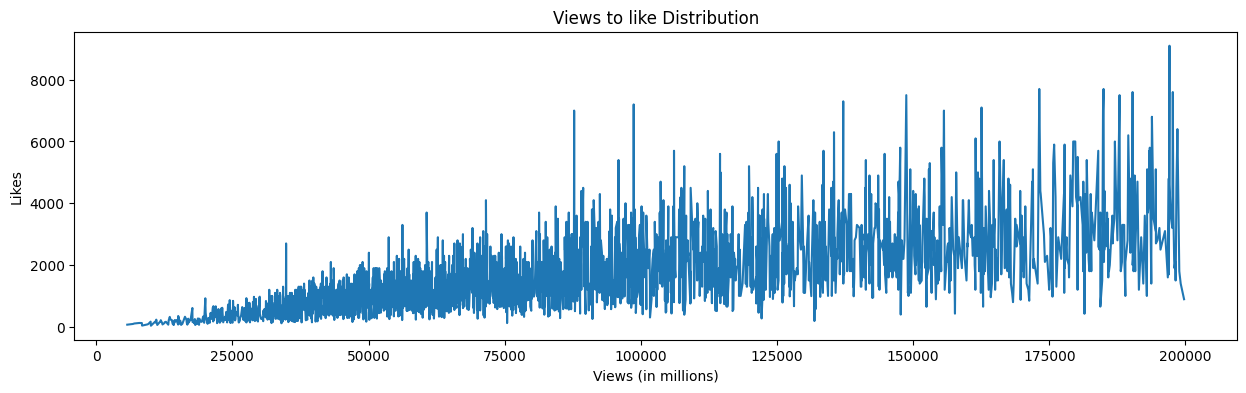

In [17]:
views = df_.sort_values(by='views')['views']
likes = df_.sort_values(by='views')['likes']


fig, ax = plt.subplots(figsize=(15,4))
ax.plot(views, likes)
plt.xlabel('Views (in millions)')
plt.ylabel('Likes')
plt.title('Views to like Distribution')
plt.show()

#### d) Correlation between views to data
###### d.1) Total views in all the video on day basis

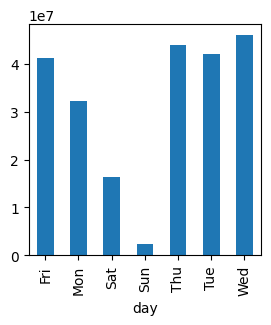

In [18]:
# Based on total
fig, ax = plt.subplots(figsize=(3,3))
df.groupby('day')['views'].sum().plot(kind='bar')
plt.show()

###### d.2) Total number of video uploaded on day basis

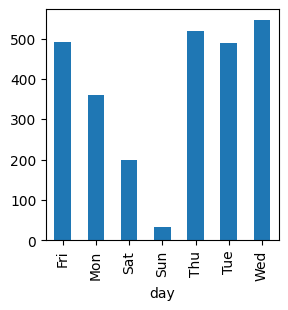

In [19]:
fig, ax = plt.subplots(figsize=(3,3))
df.groupby('day')['views'].size().plot(kind='bar')
plt.show()

###### d.3) Average number of views in all the video on day basis

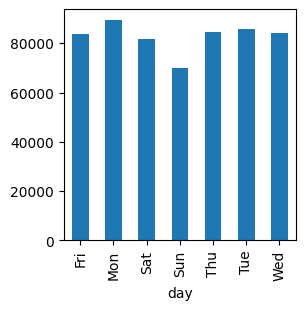

In [20]:
fig, ax = plt.subplots(figsize=(3,3))
df.groupby('day')['views'].mean().plot(kind='bar')
plt.show()

### There is very positive correlation between Views and likes

#### >> Correlation between [Likes, Predicted Likes]

In [21]:
data = []
for i in df.values:
    data.append([i[2], i[3], i[10]])
df_ = pd.DataFrame(data, columns=['views', 'likes', 'predicted_likes'])

In [22]:
views_ = df_.sort_values(by='views')['views']
likes_ = df_.sort_values(by='views')['likes']
predicted_likes = df_.sort_values(by='views')['predicted_likes']

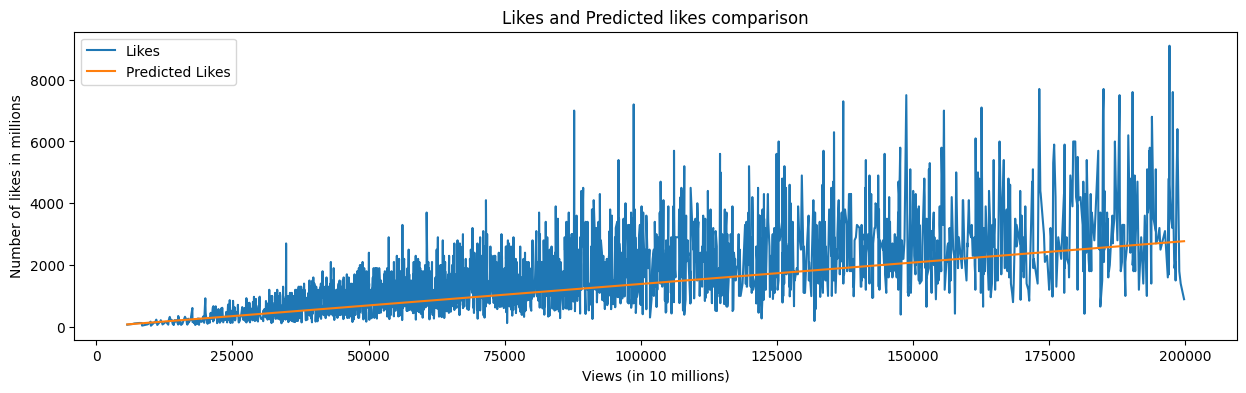

In [23]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(views_, likes_, label='Likes')
ax.plot(views_, predicted_likes, label = 'Predicted Likes')
plt.xlabel('Views (in 10 millions)')
plt.ylabel('Number of likes in millions')
plt.title('Likes and Predicted likes comparison')
plt.legend()
plt.show()

### Finding Loss using Mean error

In [24]:
total_error = []
for i in df.values:
    t = i[3] - i[10]
    if t>=0 :
        total_error.append(t)
    else:
        total_error.append(-t)
        
avg_error = sum(total_error)/len(total_error)
avg_error

697.5558500567967

#### Finding view to like ratio

In [25]:
start = int(df['views_to_like'].min() * 100000)
end = int(df['views_to_like'].max() * 100000) + 1
factors = []
for i in range(start, end):
    factors.append(i/100000)

### Predicting likes for specific factors

In [26]:
likes_ = []

for i in df['views']:
    likes_.append(int(i*factor))


### Combining Factor + Error + Ratios

In [27]:
likes = np.array(df['likes'])
data = []

for i in tqdm(range(start, end)):
    factor = i/100000
    
    pred_likes = []
    for j in df['views']:                       # Predicting likes for each factor
        pred_likes.append(int(j*factor))
    pred_likes = np.array(pred_likes)
        
    total_error = []
    for k in range(len(likes)):
        t = likes[k] - pred_likes[k]
        if t>=0 :
            total_error.append(t)
        else:
            total_error.append(-t)
    total_error = np.array(total_error)  
    
    error = int(total_error.mean())
    
    data.append([factor, error])

100%|█████████████████████████████████████████████████████████████████████████████| 7834/7834 [00:53<00:00, 146.10it/s]


In [33]:
df_ = pd.DataFrame(data, columns=['factor', 'error'])
df_.sort_values(by='error').head(1)

,factor,error
1643,0.01786,648


In [34]:
count = 0
for i in df_.values:
    if i[1] == 648:
        count += 1

In [35]:
df_ = pd.DataFrame(data, columns=['factor', 'error'])
final_factor = df_.sort_values(by='error').head(count).mean()['factor']
final_factor = round(final_factor, 5)
final_factor

0.01776

In [36]:
likes_ = []
for i in df['views']:
    likes_.append(int(i * final_factor))
    
df['predicted_likes'] = likes_
df.head()

,duration,title,views,likes,comments,date,month,year,day,views_to_like,predicted_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706,910
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387,454
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954,380
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.03137,679
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.01387,574


### Actutal to predicted likes with best fit factor

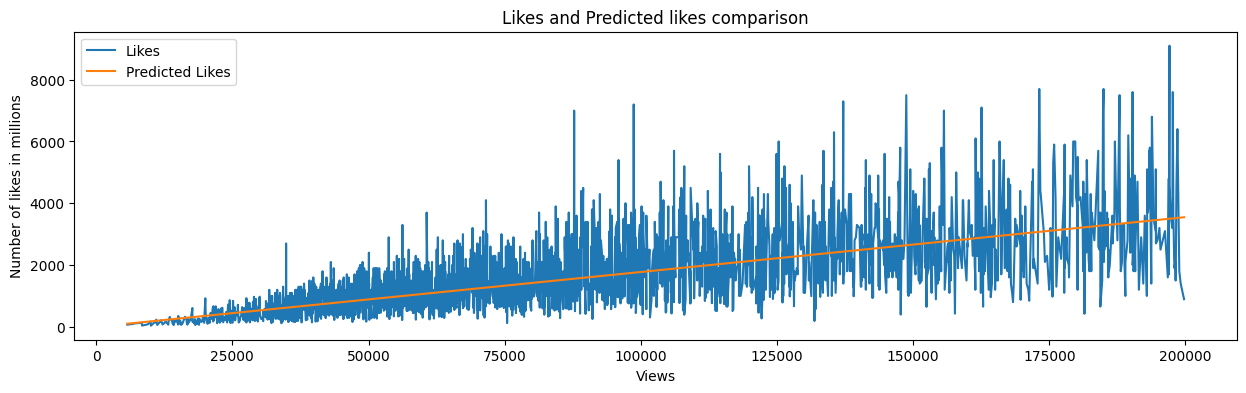

In [38]:
data = []
for i in df.values:
    data.append([i[2], i[3], i[10]])
df_ = pd.DataFrame(data, columns=['views', 'likes', 'predicted_likes'])

views_ = df_.sort_values(by='views')['views']
likes_ = df_.sort_values(by='views')['likes']
predicted_likes = df_.sort_values(by='views')['predicted_likes']

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(views_, likes_, label='Likes')
ax.plot(views_, predicted_likes, label = 'Predicted Likes')
plt.xlabel('Views')
plt.ylabel('Number of likes in millions')
plt.title('Likes and Predicted likes comparison')
plt.legend()
plt.show()